Homework 4: Sentiment Analysis - Task 0, Task 1, Task 5 (all primarily written tasks)
----

The following instructions are only written in this notebook but apply to all notebooks and `.py` files you submit for this homework.

Due date: October 25th, 2023

Points: 
- Task 0: 5 points
- Task 1: 10 points
- Task 2: 30 points
- Task 3: 20 points
- Task 4: 20 points
- Task 5: 15 points

Goals:
- understand the difficulties of counting and probablities in NLP applications
- work with real world data to build a functioning language model
- stress test your model (to some extent)

Complete in groups of: __two (pairs)__. If you prefer to work on your own, you may, but be aware that this homework has been designed as a partner project.

Allowed python modules:
- `numpy`, `matplotlib`, `keras`, `pytorch`, `nltk`, `pandas`, `sci-kit learn` (`sklearn`), `seaborn`, and all built-in python libraries (e.g. `math` and `string`)
- if you would like to use a library not on this list, post on piazza to request permission
- all *necessary* imports have been included for you (all imports that we used in our solution)

Instructions:
- Complete outlined problems in this notebook. 
- When you have finished, __clear the kernel__ and __run__ your notebook "fresh" from top to bottom. Ensure that there are __no errors__. 
    - If a problem asks for you to write code that does result in an error (as in, the answer to the problem is an error), leave the code in your notebook but commented out so that running from top to bottom does not result in any errors.
- Double check that you have completed Task 0.
- Submit your work on Gradescope.
- Double check that your submission on Gradescope looks like you believe it should __and__ that all partners are included (for partner work).

6120 students: complete __all__ problems.

4120 students: you are not required to complete problems marked "CS 6120 REQUIRED". If you complete these you will not get extra credit. We will not take points off if you attempt these problems and do not succeed.

Names & Sections
----
Names:  Julia Geller (4120) and Shae Marks (4120)


Task 0: Name, References, Reflection (5 points)
---

References
---
List the resources you consulted to complete this homework here. Write one sentence per resource about what it provided to you. If you consulted no references to complete your assignment, write a brief sentence stating that this is the case and why it was the case for you.

(Example)
- https://docs.python.org/3/tutorial/datastructures.html
    - Read about the the basics and syntax for data structures in python.

AI Collaboration
---
Following the *AI Collaboration Policy* in the syllabus, please cite any LLMs that you used here and briefly describe what you used them for. Additionally, provide comments in-line identifying the specific sections that you used LLMs on, if you used them towards the generation of any of your answers.

__NEW__: Do not include nested list comprehensions supplied by AI collaborators — all nested lists comprehensions __must__ be re-written.

Reflection
----
Answer the following questions __after__ you complete this assignment (no more than 1 sentence per question required, this section is graded on completion):

1. Does this work reflect your best effort?
2. What was/were the most challenging part(s) of the assignment?
3. If you want feedback, what function(s) or problem(s) would you like feedback on and why?
4. Briefly reflect on how your partnership functioned--who did which tasks, how was the workload on each of you individually as compared to the previous homeworks, etc.

Task 1: Provided Data Write-Up (10 points)
---

Every time you use a data set in an NLP application (or in any software application), you should be able to answer a set of questions about that data. Answer these now. Default to no more than 1 sentence per question needed. If more explanation is necessary, do give it.

This is about the __provided__ movie review data set.

1. Where did you get the data from?

 The provided dataset(s) were sub-sampled from https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews 

2. (1 pt) How was the data collected (where did the people acquiring the data get it from and how)?

The data is a collection of movie reviews from IMDB and were likely scraped from the site.

3. (2 pts) How large is the dataset (answer for both the train and the dev set, separately)? (# reviews, # tokens in both the train and dev sets)

The train set is made up of 1600 reviews with a total of 425421 tokens in those reviews (Using the  provided generate_tuples_from_file method). The dev set is made up of 200 reviews with a total of 54603 tokens in those reviews.


4. (1 pt) What is your data? (i.e. newswire, tweets, books, blogs, etc)

The data is highly polarized (distinctly negative or positive) movie reviews.

5. (1 pt) Who produced the data? (who were the authors of the text? Your answer might be a specific person or a particular group of people)

The authors of the reviews are a collection of IMDB users who have watched various movies. 

The dataset was published on Kaggle by user LAKSHMIPATHI N. The description on Kaggle links to a web page telling users to contact Andrew Maas for questions about this dataset. The web page belongs to Andrew Maas' Stanford website, so Andrew is likely a collector of this IMDB data.

6. (2 pts) What is the distribution of labels in the data (answer for both the train and the dev set, separately)?

The classes in the data are 0 and 1 (negative and positive, respectively). The training set has 796 reviews in class 0 and 804 reviews in class 1. The dev set has 95 reviews in class 0 and 105 reviews in class 1.


7. (2 pts) How large is the vocabulary (answer for both the train and the dev set, separately)?


We used the provided generate_tuples_from_file function to tokenize the reviews and took the set of those tokens to get the vocab size. The training set has a vocab size of 30705, and the dev set has a vocab size of 8953.


8. (1 pt) How big is the overlap between the vocabulary for the train and dev set?

The train and dev vocabs have an overlap of 6574 tokens.

In [1]:
# our utility functions
# RESTART your jupyter notebook kernel if you make changes to this file
import sentiment_utils as sutils
import math

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shaem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Feel free to write code to help answer the above questions
from collections import Counter

# DETERMINING SIZE OF THE DATASET 
TRAIN_FILE = "movie_reviews_train.txt"
DEV_FILE = "movie_reviews_dev.txt"

train_tups = sutils.generate_tuples_from_file(TRAIN_FILE)
dev_tups = sutils.generate_tuples_from_file(DEV_FILE)

X_train, y_train = train_tups
X_dev, y_dev = dev_tups

# TRAIN 
print("X_train example:", X_train[0])
print("y_train example:", y_train[0])
print('Number of reviews in the training set:', len(X_train))
assert len(X_train) == len(y_train)

# flatten list of list 
train_tokens = list(sum(X_train,[]))
print('Number of tokens in training set:', len(train_tokens), "\n\n")


# DEV
print("X_dev example:", X_dev[0])
print("y_dev example:", y_dev[0])
print('Number of reviews in the dev set:', len(X_dev))
assert len(X_dev) == len(y_dev)

# flatten list of list 
dev_tokens = list(sum(X_dev,[]))
print('Number of tokens in dev set:', len(dev_tokens), "\n\n")

X_train example: ['Van', 'Dien', 'must', 'cringe', 'with', 'embarrassment', 'at', 'the', 'memory', 'of', 'this', 'ludicrously', 'poor', 'film', ',', 'as', 'indeed', 'must', 'every', 'single', 'individual', 'involved', '.', 'To', 'be', 'honest', 'I', 'am', 'rather', 'embarrassed', 'to', 'admit', 'I', 'watched', 'it', 'from', 'start', 'to', 'finish', '.', 'Production', 'values', 'are', 'somewhere', 'between', 'the', 'original', 'series', 'of', "'Crossroads", "'", 'and', "'Prisoner", 'Cell', 'Block', 'H', "'", '.', 'Most', 'five', 'year', 'olds', 'would', 'be', 'able', 'to', 'come', 'up', 'with', 'more', 'realistic', 'dialogue', 'and', 'a', 'more', 'plausible', 'plot', '.', 'As', 'for', 'the', 'acting', 'performances', ',', 'if', 'you', 'can', 'imagine', 'the', 'most', 'rubbish', 'porno', 'you', 'have', 'ever', 'seen', '-', 'one', 'of', 'those', 'ones', 'where', 'the', 'action', 'is', 'padded', 'out', 'with', 'some', 'interminable', "'story", "'", 'to', 'explain', 'how', 'some', 'pouting'

In [3]:
# DETERMINING DISTRIBUTION OF LABELS 

# TRAIN
print('Unique label values in training data:', set(y_train))
train_label_count = Counter(y_train)
print('Number of reviews with 0 class in training set:', train_label_count[0])
print('Number of reviews with 1 class in training set:', train_label_count[1])
assert train_label_count[0] +  train_label_count[1] == 1600
print()

# DEV
print('Unique label values in dev data:', set(y_dev))
dev_label_count = Counter(y_dev)
print('Number of reviews with 0 class in dev set:', dev_label_count[0])
print('Number of reviews with 1 class in dev set:', dev_label_count[1])
assert dev_label_count[0] +  dev_label_count[1] == 200

Unique label values in training data: {0, 1}
Number of reviews with 0 class in training set: 796
Number of reviews with 1 class in training set: 804

Unique label values in dev data: {0, 1}
Number of reviews with 0 class in dev set: 95
Number of reviews with 1 class in dev set: 105


In [4]:
# DETERMINING SIZE OF VOCAB 

# TRAIN
train_vocab = set(train_tokens)
print("Size of training vocab:", len(train_vocab))


# DEV 
dev_vocab = set(dev_tokens)
print("Size of dev vocab:", len(dev_vocab))

# OVERLAP
print("Size of vocab overlap:", len(set.intersection(train_vocab, dev_vocab)))

Size of training vocab: 30705
Size of dev vocab: 8953
Size of vocab overlap: 6574


Task 5: Model Evaluation (15 points)
---
Save your three graph files for the __best__ configurations that you found with your models using the `plt.savefig(filename)` command. The `bbox_inches` optional parameter will help you control how much whitespace outside of the graph is in your resulting image.
Run your each notebook containing a classifier 3 times, resulting in __NINE__ saved graphed (don't just overwrite your previous ones).

You will turn in all of these files.

10 points in this section are allocated for having all nine graphs legible, properly labeled, and present.




1. (1 pt) When using __10%__ of your data, which model had the highest f1 score?

The Logistic Regression model had the highest f1 score (0.732) when trained on 10% of the data and tested on the full dev set.

2. (1 pt) Which classifier had the most __consistent__ performance (that is, which classifier had the least variation across all three graphs you have for it -- no need to mathematically calculate this, you can just look at the graphs)? 

Naive Bayes and Logistic Regression both performed consistently across the three graphs. Naive Bayes showed the most consistent improvement as we added more training data, while the performance of the Logistic Regression and Neural Network models jumped around more.

3. (1 pt) For each model, what percentage of training data resulted in the highest f1 score?
    1. Naive Bayes: When 50% of the training data was used (f1: 0.8172)
    2. Logistic Regression: When 90% of the training data was used (f1: 0.8219)
    3. Neural Net: When 90% of the training data was used (f1: 0.832)

To determine this, I printed out the metrics used in the graphs below. F1 score at index 2 (aka the third number).

4. (2 pts) Which model, if any, appeared to overfit the training data the most? Why?

### TODO 


0.1 of training data used
0.8888888888888888 0.22857142857142856 0.3636363636363636 0.58
0.2 of training data used
0.9393939393939394 0.29523809523809524 0.4492753623188405 0.62
0.30000000000000004 of training data used
0.8888888888888888 0.45714285714285713 0.6037735849056604 0.685
0.4 of training data used
0.9315068493150684 0.6476190476190476 0.7640449438202247 0.79
0.5 of training data used
0.9382716049382716 0.7238095238095238 0.8172043010752689 0.83
0.6 of training data used
0.8863636363636364 0.7428571428571429 0.8082901554404146 0.815
0.7000000000000001 of training data used
0.8315789473684211 0.7523809523809524 0.79 0.79
0.8 of training data used
0.8777777777777778 0.7523809523809524 0.8102564102564102 0.815
0.9 of training data used
0.8666666666666667 0.7428571428571429 0.8 0.805
1.0 of training data used
0.8681318681318682 0.7523809523809524 0.8061224489795917 0.81


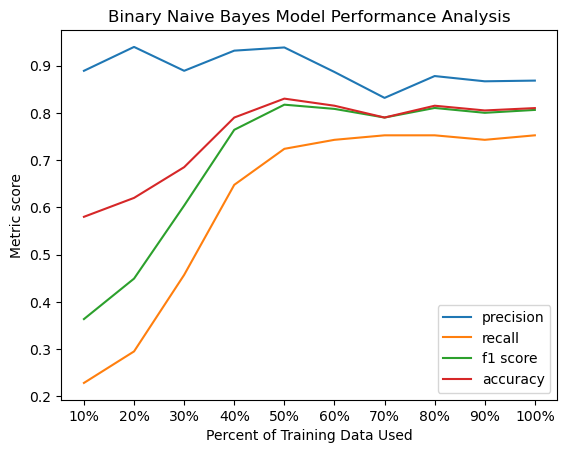

0.1 of training data used
0.8888888888888888 0.22857142857142856 0.3636363636363636 0.58
0.2 of training data used
0.9393939393939394 0.29523809523809524 0.4492753623188405 0.62
0.30000000000000004 of training data used
0.8888888888888888 0.45714285714285713 0.6037735849056604 0.685
0.4 of training data used
0.9315068493150684 0.6476190476190476 0.7640449438202247 0.79
0.5 of training data used
0.9382716049382716 0.7238095238095238 0.8172043010752689 0.83
0.6 of training data used
0.8863636363636364 0.7428571428571429 0.8082901554404146 0.815
0.7000000000000001 of training data used
0.8315789473684211 0.7523809523809524 0.79 0.79
0.8 of training data used
0.8777777777777778 0.7523809523809524 0.8102564102564102 0.815
0.9 of training data used
0.8666666666666667 0.7428571428571429 0.8 0.805
1.0 of training data used
0.8681318681318682 0.7523809523809524 0.8061224489795917 0.81


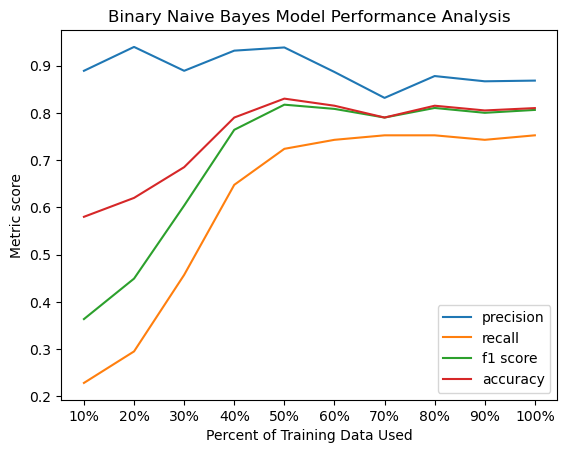

0.1 of training data used
0.8888888888888888 0.22857142857142856 0.3636363636363636 0.58
0.2 of training data used
0.9393939393939394 0.29523809523809524 0.4492753623188405 0.62
0.30000000000000004 of training data used
0.8888888888888888 0.45714285714285713 0.6037735849056604 0.685
0.4 of training data used
0.9315068493150684 0.6476190476190476 0.7640449438202247 0.79
0.5 of training data used
0.9382716049382716 0.7238095238095238 0.8172043010752689 0.83
0.6 of training data used
0.8863636363636364 0.7428571428571429 0.8082901554404146 0.815
0.7000000000000001 of training data used
0.8315789473684211 0.7523809523809524 0.79 0.79
0.8 of training data used
0.8777777777777778 0.7523809523809524 0.8102564102564102 0.815
0.9 of training data used
0.8666666666666667 0.7428571428571429 0.8 0.805
1.0 of training data used
0.8681318681318682 0.7523809523809524 0.8061224489795917 0.81


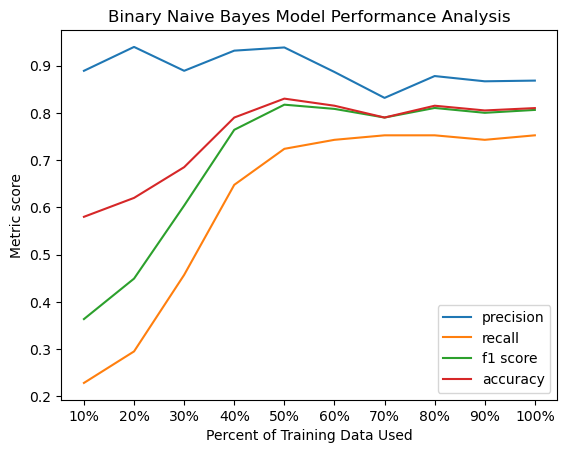

<Figure size 640x480 with 0 Axes>

In [12]:
# NAIVE BAYES -- Binarized Features  (which had the best f1 score)

vocab = train_vocab
X_train_feats_nb = sutils.naive_bayes_featurize(X_train, vocab, binary=True)
nb_train_data = [(x, y) for x,y in zip(X_train_feats_nb, y_train)]

X_dev_feats_nb = sutils.naive_bayes_featurize(X_dev, vocab, binary=True)
nb_dev_data = [(x, y) for x,y in zip(X_dev_feats_nb, y_dev)]

sutils.create_training_graph(sutils.naive_bayes_metrics, nb_train_data, nb_dev_data, 'Binary Naive Bayes', 'Naive_Bayes_Final_1', verbose=True)
sutils.create_training_graph(sutils.naive_bayes_metrics, nb_train_data, nb_dev_data, 'Binary Naive Bayes', 'Naive_Bayes_Final_2', verbose=True)
sutils.create_training_graph(sutils.naive_bayes_metrics, nb_train_data, nb_dev_data, 'Binary Naive Bayes', 'Naive_Bayes_Final_3', verbose=True)

0.1 of training data used
0.7222222222222222 0.7428571428571429 0.732394366197183 0.715
0.2 of training data used
0.7636363636363637 0.8 0.7813953488372093 0.765
0.30000000000000004 of training data used
0.7478991596638656 0.8476190476190476 0.7946428571428571 0.77
0.4 of training data used
0.7317073170731707 0.8571428571428571 0.7894736842105263 0.76
0.5 of training data used
0.7567567567567568 0.8 0.7777777777777778 0.76
0.6 of training data used
0.7631578947368421 0.8285714285714286 0.7945205479452055 0.775
0.7000000000000001 of training data used
0.75 0.8 0.7741935483870969 0.755
0.8 of training data used
0.7807017543859649 0.8476190476190476 0.8127853881278538 0.795
0.9 of training data used
0.7894736842105263 0.8571428571428571 0.8219178082191781 0.805
1.0 of training data used
0.7946428571428571 0.8476190476190476 0.8202764976958524 0.805


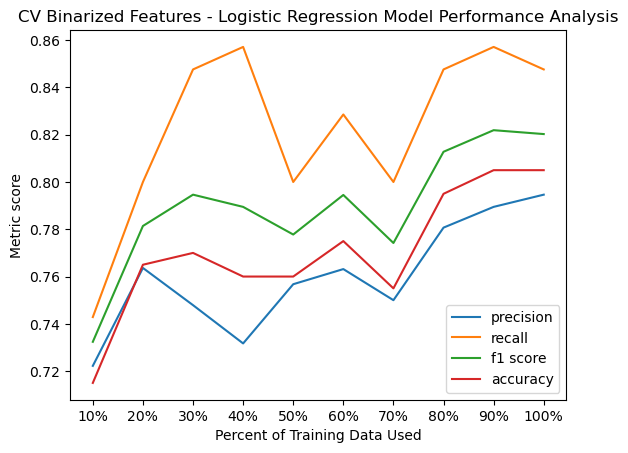

0.1 of training data used
0.7222222222222222 0.7428571428571429 0.732394366197183 0.715
0.2 of training data used
0.7636363636363637 0.8 0.7813953488372093 0.765
0.30000000000000004 of training data used
0.7478991596638656 0.8476190476190476 0.7946428571428571 0.77
0.4 of training data used
0.7317073170731707 0.8571428571428571 0.7894736842105263 0.76
0.5 of training data used
0.7567567567567568 0.8 0.7777777777777778 0.76
0.6 of training data used
0.7631578947368421 0.8285714285714286 0.7945205479452055 0.775
0.7000000000000001 of training data used
0.75 0.8 0.7741935483870969 0.755
0.8 of training data used
0.7807017543859649 0.8476190476190476 0.8127853881278538 0.795
0.9 of training data used
0.7894736842105263 0.8571428571428571 0.8219178082191781 0.805
1.0 of training data used
0.7946428571428571 0.8476190476190476 0.8202764976958524 0.805


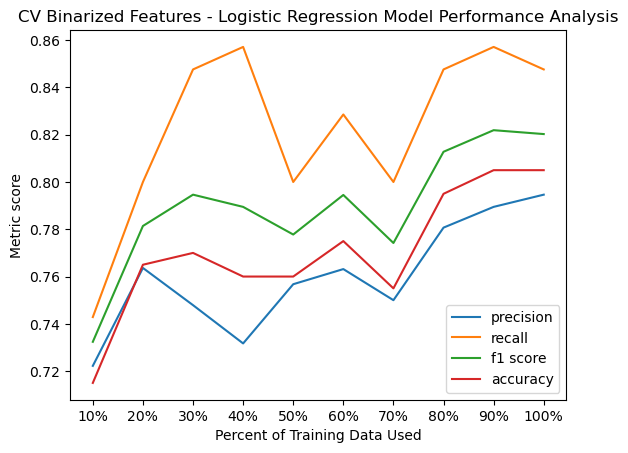

0.1 of training data used
0.7222222222222222 0.7428571428571429 0.732394366197183 0.715
0.2 of training data used
0.7636363636363637 0.8 0.7813953488372093 0.765
0.30000000000000004 of training data used
0.7478991596638656 0.8476190476190476 0.7946428571428571 0.77
0.4 of training data used
0.7317073170731707 0.8571428571428571 0.7894736842105263 0.76
0.5 of training data used
0.7567567567567568 0.8 0.7777777777777778 0.76
0.6 of training data used
0.7631578947368421 0.8285714285714286 0.7945205479452055 0.775
0.7000000000000001 of training data used
0.75 0.8 0.7741935483870969 0.755
0.8 of training data used
0.7807017543859649 0.8476190476190476 0.8127853881278538 0.795
0.9 of training data used
0.7894736842105263 0.8571428571428571 0.8219178082191781 0.805
1.0 of training data used
0.7946428571428571 0.8476190476190476 0.8202764976958524 0.805


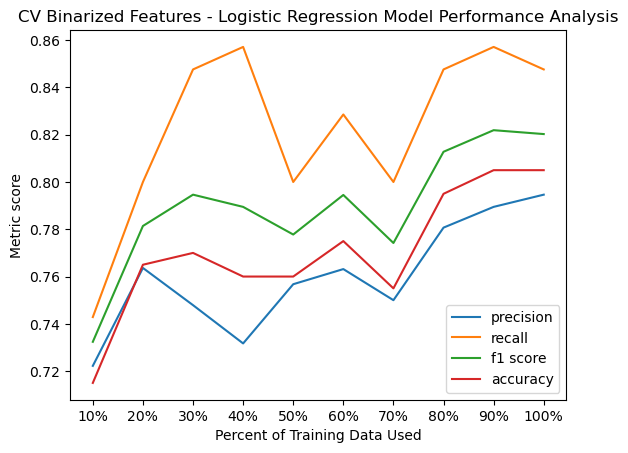

<Figure size 640x480 with 0 Axes>

In [13]:
# LOGISTIC REGRESSION - CountVectorizer, Binarized Features (which had the best f1 score)

# using CountVectorizer, which will discover the vocab itself 
X_train_flat = [' '.join(row) for row in X_train]
X_dev_flat = [' '.join(row) for row in X_dev]

X_train_CV_binary, X_dev_CV_binary = sutils.featurize('CV', X_train_flat, X_dev_flat, binary = True)

log_reg_train_feats = [(x, y) for x,y in zip(X_train_CV_binary, y_train)]
log_reg_dev_feats = [(x, y) for x,y in zip(X_dev_CV_binary, y_dev)]

sutils.create_training_graph(sutils.log_reg_metrics, log_reg_train_feats, log_reg_dev_feats, 'CV Binarized Features - Logistic Regression', 'Logistic_Regression_Final_1', verbose=True)
sutils.create_training_graph(sutils.log_reg_metrics, log_reg_train_feats, log_reg_dev_feats, 'CV Binarized Features - Logistic Regression', 'Logistic_Regression_Final_2', verbose=True)
sutils.create_training_graph(sutils.log_reg_metrics, log_reg_train_feats, log_reg_dev_feats, 'CV Binarized Features - Logistic Regression', 'Logistic_Regression_Final_3', verbose=True)

0.1 of training data used
Epoch 1/10
5/5 [==============================] - 1s 15ms/step - loss: 0.6978 - accuracy: 0.4750
Epoch 2/10
5/5 [==============================] - 0s 14ms/step - loss: 0.6877 - accuracy: 0.5312
Epoch 3/10
5/5 [==============================] - 0s 13ms/step - loss: 0.6784 - accuracy: 0.6562
Epoch 4/10
5/5 [==============================] - 0s 13ms/step - loss: 0.6698 - accuracy: 0.7250
Epoch 5/10
5/5 [==============================] - 0s 14ms/step - loss: 0.6620 - accuracy: 0.8188
Epoch 6/10
5/5 [==============================] - 0s 24ms/step - loss: 0.6523 - accuracy: 0.8500
Epoch 7/10
5/5 [==============================] - 0s 13ms/step - loss: 0.6442 - accuracy: 0.8813
Epoch 8/10
5/5 [==============================] - 0s 13ms/step - loss: 0.6364 - accuracy: 0.9000
Epoch 9/10
5/5 [==============================] - 0s 26ms/step - loss: 0.6281 - accuracy: 0.9375
Epoch 10/10
7/7 [==============================] - 0s 6ms/step
0.6818181818181818 0.7142857142857143 

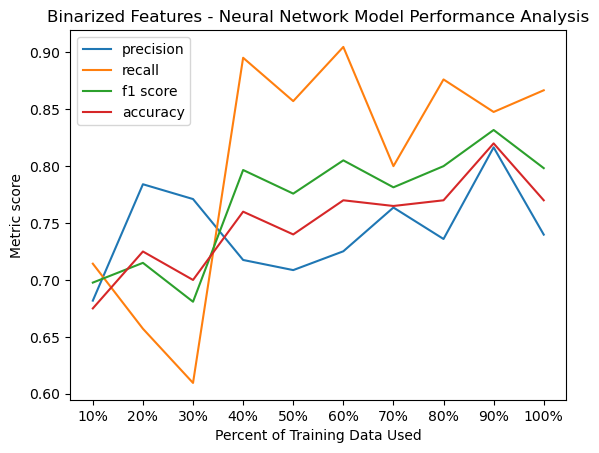

0.1 of training data used
Epoch 1/10
5/5 [==============================] - 1s 28ms/step - loss: 0.6937 - accuracy: 0.5312
Epoch 2/10
5/5 [==============================] - 0s 36ms/step - loss: 0.6842 - accuracy: 0.6125
Epoch 3/10
5/5 [==============================] - 0s 27ms/step - loss: 0.6742 - accuracy: 0.7000
Epoch 4/10
5/5 [==============================] - 0s 30ms/step - loss: 0.6640 - accuracy: 0.7750
Epoch 5/10
5/5 [==============================] - 0s 30ms/step - loss: 0.6554 - accuracy: 0.8313
Epoch 6/10
5/5 [==============================] - 0s 30ms/step - loss: 0.6466 - accuracy: 0.8687
Epoch 7/10
5/5 [==============================] - 0s 39ms/step - loss: 0.6380 - accuracy: 0.9062
Epoch 8/10
5/5 [==============================] - 0s 30ms/step - loss: 0.6299 - accuracy: 0.9187
Epoch 9/10
5/5 [==============================] - 0s 37ms/step - loss: 0.6206 - accuracy: 0.9375
Epoch 10/10
7/7 [==============================] - 0s 7ms/step
0.7439024390243902 0.580952380952381 0

7/7 [==============================] - 0s 7ms/step
0.71875 0.6571428571428571 0.6865671641791045 0.685
0.30000000000000004 of training data used
Epoch 1/10
16/16 [==============================] - 1s 19ms/step - loss: 0.6860 - accuracy: 0.5655
Epoch 2/10
16/16 [==============================] - 0s 23ms/step - loss: 0.6693 - accuracy: 0.6902
Epoch 3/10
16/16 [==============================] - 0s 21ms/step - loss: 0.6524 - accuracy: 0.7568
Epoch 4/10
16/16 [==============================] - 0s 14ms/step - loss: 0.6365 - accuracy: 0.7380
Epoch 5/10
16/16 [==============================] - 0s 18ms/step - loss: 0.6190 - accuracy: 0.7942
Epoch 6/10
16/16 [==============================] - 1s 34ms/step - loss: 0.6006 - accuracy: 0.9023
Epoch 7/10
16/16 [==============================] - 0s 30ms/step - loss: 0.5811 - accuracy: 0.8981
Epoch 8/10
16/16 [==============================] - 1s 32ms/step - loss: 0.5628 - accuracy: 0.9044
Epoch 9/10
7/7 [==============================] - 0s 8ms/step
0

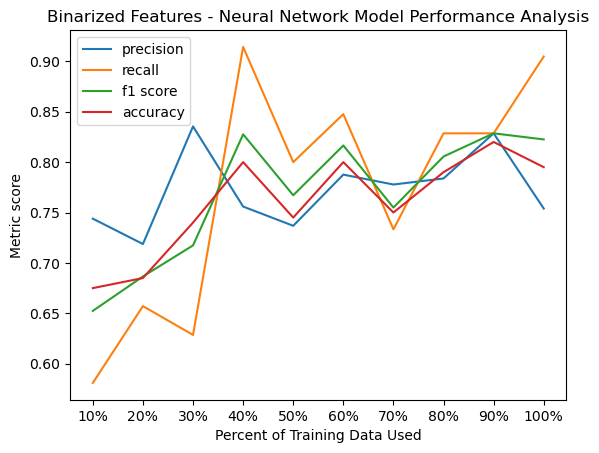

0.1 of training data used
Epoch 1/10
5/5 [==============================] - 1s 17ms/step - loss: 0.6963 - accuracy: 0.4938
Epoch 2/10
5/5 [==============================] - 0s 31ms/step - loss: 0.6838 - accuracy: 0.5625
Epoch 3/10
5/5 [==============================] - 0s 14ms/step - loss: 0.6741 - accuracy: 0.5938
Epoch 4/10
5/5 [==============================] - 0s 34ms/step - loss: 0.6621 - accuracy: 0.6562
Epoch 5/10
5/5 [==============================] - 0s 46ms/step - loss: 0.6519 - accuracy: 0.7375
Epoch 6/10
5/5 [==============================] - 0s 29ms/step - loss: 0.6405 - accuracy: 0.8500
Epoch 7/10
5/5 [==============================] - 0s 32ms/step - loss: 0.6303 - accuracy: 0.8625
Epoch 8/10
5/5 [==============================] - 0s 51ms/step - loss: 0.6196 - accuracy: 0.9000
Epoch 9/10
5/5 [==============================] - 0s 36ms/step - loss: 0.6102 - accuracy: 0.9312
Epoch 10/10
7/7 [==============================] - 0s 7ms/step
0.704225352112676 0.47619047619047616 

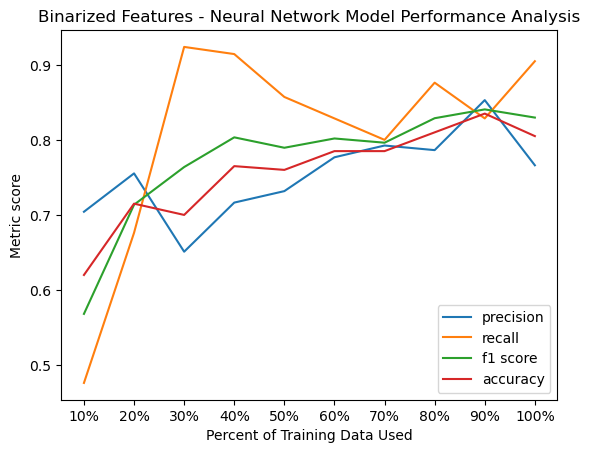

<Figure size 640x480 with 0 Axes>

In [ ]:
# NEURAL NETWORK - Binarized Features  (which had the best f1 score)

nn_train_feats = [(x, y) for x,y in zip(X_train_CV_binary, y_train)]
nn_dev_feats = [(x, y) for x,y in zip(X_dev_CV_binary, y_dev)]

sutils.create_training_graph(sutils.neural_net_metrics, nn_train_feats, nn_dev_feats, 'Binarized Features - Neural Network', 'Neural_Network_Final_1', num_epochs=10, verbose=True)
sutils.create_training_graph(sutils.neural_net_metrics, nn_train_feats, nn_dev_feats, 'Binarized Features - Neural Network', 'Neural_Network_Final_2', num_epochs=10, verbose=True)
sutils.create_training_graph(sutils.neural_net_metrics, nn_train_feats, nn_dev_feats, 'Binarized Features - Neural Network', 'Neural_Network_Final_3', num_epochs=10, verbose=True)


In [11]:
# Finding F1 scores with only 10% of data 

# NAIVE BAYES
nb_train_data_10 = nb_train_data[0:math.ceil(len(nb_train_data)*.1)]
X_train_nb_10 = [tup[0] for tup in nb_train_data_10]
y_train_nb_10 = [tup[1] for tup in nb_train_data_10]

f1_nb_10 = sutils.naive_bayes_metrics(X_train_nb_10, y_train_nb_10, X_dev_feats_nb, y_dev)[2]



# LOGISTIC REGRESSION 
log_reg_train_10 = log_reg_train_feats[0:math.ceil(len(log_reg_train_feats)*.1)]
X_train_log_reg_10 = [tup[0] for tup in log_reg_train_10]
y_train_log_reg_10 = [tup[1] for tup in log_reg_train_10]

f1_log_reg_10 = sutils.log_reg_metrics(X_train_log_reg_10, y_train_log_reg_10, X_dev_CV_binary, y_dev)[2]


# NEURAL NETWORKS 
nn_train_10 = nn_train_feats[0:math.ceil(len(nn_train_feats)*.1)]
X_train_nn_10 = [tup[0] for tup in nn_train_10]
y_train_nn_10 = [tup[1] for tup in nn_train_10]

f1_nn_10 = sutils.neural_net_metrics(X_train_nn_10, y_train_nn_10, X_dev_CV_binary, y_dev, num_epochs=10)[2]

print()
print("Naive Bayes f1 score when trained on 10 percent of data:", f1_nb_10)
print("Logistic Regression f1 score when trained on 10 percent of data:", f1_log_reg_10)
print("Neural Network f1 score when trained on 10 percent of data:", f1_nn_10)


Logistic Regression f1 score when trained on 10 percent of data: 0.732394366197183
Epoch 1/10
5/5 [==============================] - 1s 16ms/step - loss: 0.6939 - accuracy: 0.5125
Epoch 2/10
5/5 [==============================] - 0s 21ms/step - loss: 0.6820 - accuracy: 0.5750
Epoch 3/10
5/5 [==============================] - 0s 22ms/step - loss: 0.6701 - accuracy: 0.6375
Epoch 4/10
5/5 [==============================] - 0s 37ms/step - loss: 0.6591 - accuracy: 0.7188
Epoch 5/10
5/5 [==============================] - 0s 41ms/step - loss: 0.6485 - accuracy: 0.8000
Epoch 6/10
5/5 [==============================] - 0s 15ms/step - loss: 0.6383 - accuracy: 0.8250
Epoch 7/10
5/5 [==============================] - 0s 38ms/step - loss: 0.6289 - accuracy: 0.8750
Epoch 8/10
5/5 [==============================] - 0s 15ms/step - loss: 0.6174 - accuracy: 0.9125
Epoch 9/10
5/5 [==============================] - 0s 35ms/step - loss: 0.6070 - accuracy: 0.9375
Epoch 10/10
7/7 [===========================

6120 REQUIRED
----

Find a second data set that is labeled for sentiment from a different domain (not movie reivews). Rerun your notebook with this data (you should set up your notebook so that you only need to change the paths and possibly run a different pre-processing function on the data). Note that you will want binary labels.

Answer the regular data questions for your new data set
----
1. Where did you get the data from?
2. How was the data collected (where did the people acquiring the data get it from and how)?
3. How large is the dataset (answer for both the train and the dev set, separately)? (# reviews, # tokens in both the train and dev sets)
4. What is your data? (i.e. newswire, tweets, books, blogs, etc)
5. Who produced the data? (who were the authors of the text? Your answer might be a specific person or a particular group of people)
6. What is the distribution of labels in the data (answer for both the train and the dev set, separately)?
7. How large is the vocabulary (answer for both the train and the dev set, separately)?
8. How big is the overlap between the vocabulary for the train and dev set?

Answer the model evaluation questions for your new data set
----
1. When using __10%__ of your data, which model had the highest f1 score?
2. Which classifier had the most __consistent__ performance (that is, which classifier had the least variation across all three graphs you have for it -- no need to mathematically calculate this, you can just look at the graphs)?
3. For each model, what percentage of training data resulted in the highest f1 score?
    1. Naive Bayes:
    2. Logistic Regression:
    3. Neural Net:
4. Which model, if any, appeared to overfit the training data the most? Why?

In [ ]:
# any code you need to write here